In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
%matplotlib inline

In [2]:
#read data set ,import data into the variables
median_house_hold_in_come=pd.read_csv(r"C:\Users\simay\Desktop\udemy\Data_Visualizaion\MedianHouseholdIncome2015.csv",encoding="windows-1252")
percentage_people_below_poverty_level=pd.read_csv(r"C:\Users\simay\Desktop\udemy\Data_Visualizaion\PercentagePeopleBelowPovertyLevel.csv",encoding="windows-1252")
percent_over_completed_highSchool =pd.read_csv(r"C:\Users\simay\Desktop\udemy\Data_Visualizaion\PercentOver25CompletedHighSchool.csv",encoding="windows-1252")
share_race_bycity =pd.read_csv(r"C:\Users\simay\Desktop\udemy\Data_Visualizaion\ShareRaceByCity.csv",encoding="windows-1252")
killings=pd.read_csv(r"C:\Users\simay\Desktop\udemy\Data_Visualizaion\PoliceKillingsUs.csv",encoding="windows-1252")encoding="windows-1252"


In [10]:
share_race_bycitykillings.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [3]:
percentage_people_below_poverty_level.head(7)

,Geographic Area,City,poverty_rate
0,AL,Abanda CDP,78.8
1,AL,Abbeville city,29.1
2,AL,Adamsville city,25.5
3,AL,Addison town,30.7
4,AL,Akron town,42
5,AL,Alabaster city,11.2
6,AL,Albertville city,26.7


In [12]:
percentage_people_below_poverty_level.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29329 entries, 0 to 29328
Data columns (total 3 columns):
Geographic Area    29329 non-null object
City               29329 non-null object
poverty_rate       29329 non-null object
dtypes: object(3)
memory usage: 687.5+ KB


In [13]:
percentage_people_below_poverty_level.City.value_counts()

Franklin city            16
Marion city              14
Salem city               14
Madison city             14
Auburn city              13
Clinton city             13
Springfield city         13
Greenville city          12
Aurora city              12
Columbus city            11
Mount Vernon city        11
Trenton city             10
Princeton city           10
Monroe city              10
Jackson city             10
Lancaster city           10
Lexington city           10
Lebanon city             10
Washington city          10
Hamilton city            10
Richmond city            10
Troy city                10
Fairfield city            9
Monticello city           9
Cambridge city            9
Fairview CDP              9
Cleveland city            9
Arlington city            9
Hillsboro city            9
Burlington city           9
                         ..
Merced city               1
Northgate CDP             1
Trezevant town            1
Potlicker Flats CDP       1
Kingstown CDP       

In [4]:
percentage_people_below_poverty_level.poverty_rate.value_counts()#our data is liitle bit problematic.fakirlik oranı 0 olan 1464 tane yer varmış
#we want to erease '-' this our data

0       1464
-        201
6.7      129
7.4      129
10       128
10.9     128
6.3      126
4.4      126
11.5     125
8.3      125
7.9      123
8.6      122
8.7      122
10.2     122
5.9      122
11.1     122
12.8     121
8.8      121
14.3     121
8.5      120
13.5     120
9.1      120
10.8     118
11.2     118
16       118
9.3      118
15.4     118
8        117
11.3     117
7.3      117
        ... 
83.3       1
54.2       1
76.3       1
50.7       1
68.9       1
56.5       1
61.5       1
71.1       1
68         1
90.9       1
74.1       1
88.2       1
64         1
65         1
67.6       1
98.6       1
58.2       1
74.5       1
86.7       1
83.9       1
93.3       1
70.6       1
85         1
73         1
78         1
88         1
77.2       1
73.1       1
69.7       1
86         1
Name: poverty_rate, Length: 771, dtype: int64

In [5]:
#lets get rid of '-' 
percentage_people_below_poverty_level.poverty_rate.replace(['-'],0.0,inplace=True)
percentage_people_below_poverty_level.poverty_rate.value_counts()


0       1464
0.0      201
6.7      129
7.4      129
10       128
10.9     128
6.3      126
4.4      126
8.3      125
11.5     125
7.9      123
5.9      122
8.7      122
11.1     122
10.2     122
8.6      122
8.8      121
14.3     121
12.8     121
13.5     120
8.5      120
9.1      120
16       118
10.8     118
11.2     118
15.4     118
9.3      118
7.5      117
8        117
7.3      117
        ... 
88.2       1
93.3       1
73.5       1
74.3       1
64         1
58.6       1
56.7       1
70.6       1
70.7       1
50.7       1
83.9       1
80.6       1
58.2       1
92.9       1
88.9       1
69.3       1
66.3       1
65.5       1
68.7       1
81.7       1
84.3       1
57.7       1
88         1
83         1
78         1
65         1
70         1
75         1
67.6       1
59.9       1
Name: poverty_rate, Length: 771, dtype: int64

In [15]:
killings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2535 entries, 0 to 2534
Data columns (total 14 columns):
id                         2535 non-null int64
name                       2535 non-null object
date                       2535 non-null object
manner_of_death            2535 non-null object
armed                      2526 non-null object
age                        2458 non-null float64
gender                     2535 non-null object
race                       2340 non-null object
city                       2535 non-null object
state                      2535 non-null object
signs_of_mental_illness    2535 non-null bool
threat_level               2535 non-null object
flee                       2470 non-null object
body_camera                2535 non-null bool
dtypes: bool(2), float64(1), int64(1), object(10)
memory usage: 242.7+ KB


In [16]:
killings.manner_of_death.value_counts()

shot                2363
shot and Tasered     172
Name: manner_of_death, dtype: int64

In [17]:
percentage_people_below_poverty_level.info() #as you can see poverty_rate is an object and I want to be float

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29329 entries, 0 to 29328
Data columns (total 3 columns):
Geographic Area    29329 non-null object
City               29329 non-null object
poverty_rate       29329 non-null object
dtypes: object(3)
memory usage: 687.5+ KB


In [4]:
percentage_people_below_poverty_level.head()

,Geographic Area,City,poverty_rate
0,AL,Abanda CDP,78.8
1,AL,Abbeville city,29.1
2,AL,Adamsville city,25.5
3,AL,Addison town,30.7
4,AL,Akron town,42


In [6]:
#I want to find povert _rate of ecah state So first I should check every unique georaphic area .SO use unique()
percentage_people_below_poverty_level['Geographic Area'].unique()

array(['AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'DC', 'FL', 'GA',
       'HI', 'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD', 'MA',
       'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', 'NM', 'NY',
       'NC', 'ND', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX',
       'UT', 'VT', 'VA', 'WA', 'WV', 'WI', 'WY'], dtype=object)

In [7]:
#how many unique georaphic area is there?
len(percentage_people_below_poverty_level['Geographic Area'].unique())

51

In [8]:
len(percentage_people_below_poverty_level['Geographic Area'])

29329

Text(0.5,1,'Poverty Rate Given States')

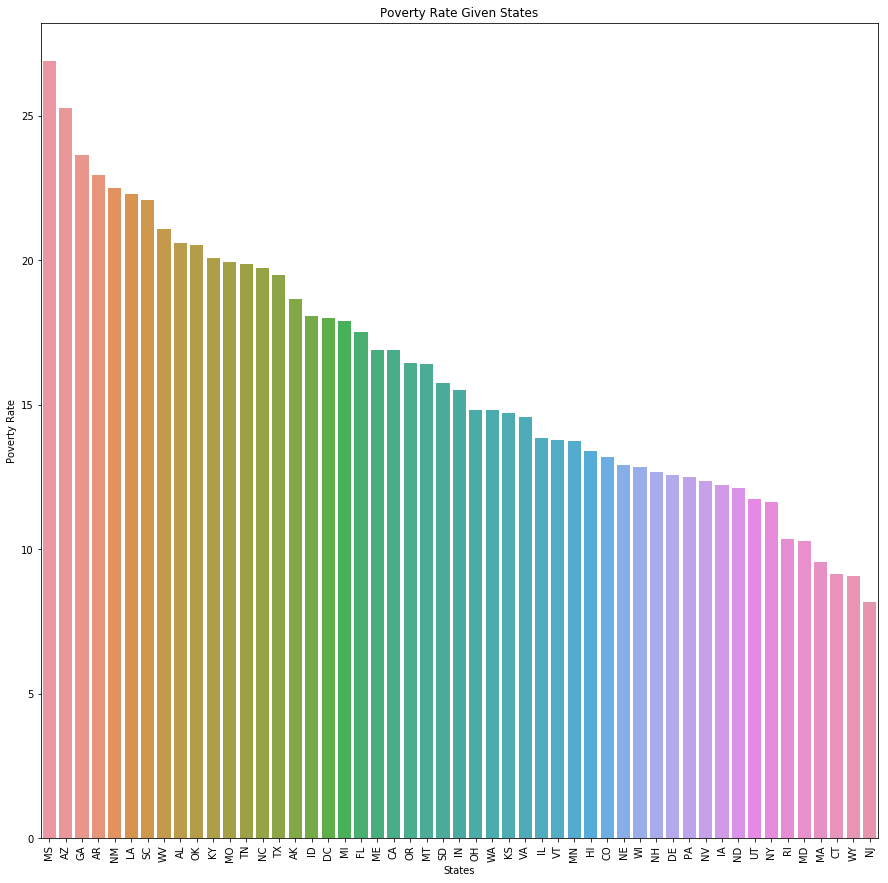

In [6]:
#now lets do data viualization but I have to order georaphip area depend on poverty_rate among like from big ratio to small ratio.
#My aim is to sort the data regularly.
#first ı'll put my ercentage_people_below_poverty_level['Geographic Area'].unique())into the area_list that means put the list.
# Poverty rate of each state
percentage_people_below_poverty_level.poverty_rate.replace(['-'],0.0,inplace = True)
percentage_people_below_poverty_level.poverty_rate = percentage_people_below_poverty_level.poverty_rate.astype(float)
area_list = list(percentage_people_below_poverty_level['Geographic Area'].unique())
area_poverty_ratio = []
for i in area_list:
    x = percentage_people_below_poverty_level[percentage_people_below_poverty_level['Geographic Area']==i]
    area_poverty_rate = sum(x.poverty_rate)/len(x)
    area_poverty_ratio.append(area_poverty_rate)
data = pd.DataFrame({'area_list': area_list,'area_poverty_ratio':area_poverty_ratio})
new_index = (data['area_poverty_ratio'].sort_values(ascending=False)).index.values
sorted_data1 = data.reindex(new_index)

# visualization
plt.figure(figsize=(15,15)) #en 15 uzunluğu 10 olan alan yarat
sns.barplot(x=sorted_data1['area_list'], y=sorted_data1['area_poverty_ratio'])
plt.xticks(rotation= 90)
plt.xlabel('States')
plt.ylabel('Poverty Rate')
plt.title('Poverty Rate Given States')

In [25]:
#most common 15 Name of killed people
killings.head(10)
killings.name.value_counts() #TK TK means non known


TK TK                        49
Michael Johnson               2
TK Tk                         2
Michael Brown                 2
Eric Harris                   2
Daquan Antonio Westbrook      2
Brandon Jones                 2
Sherman Evans                 1
Charly Leundeu Keunang        1
David Kassick                 1
Matt Coates                   1
Osee Calix                    1
Killian O'Quinn               1
Todd Tomlinson                1
Michael Lowery                1
Rodolfo Velazquez             1
Dennis Hudson                 1
Michael Mallet                1
Kelley Brandon Forte          1
Wendell King                  1
Carlos Garcia                 1
David Lepine                  1
Keelan Charles Murray         1
Ricardo Tenorio               1
Cin Lam Mung                  1
Cedric Maurice Williams       1
Christopher Carter            1
Omar Mateen                   1
John Marcell Allen            1
Jamie Clark Long              1
                             ..
Guadalup

In [14]:
name_count

Counter({'Tim': 3,
         'Lewis': 5,
         'John': 42,
         'Matthew': 24,
         'Michael': 91,
         'Kenneth': 19,
         'Brock': 1,
         'Autumn': 1,
         'Leslie': 3,
         'Patrick': 13,
         'Ron': 2,
         'Hashim': 1,
         'Nicholas': 13,
         'Omarr': 1,
         'Loren': 3,
         'James': 56,
         'Artago': 1,
         'Thomas': 26,
         'Jimmy': 5,
         'Andy': 1,
         'Tommy': 3,
         'Brian': 12,
         'Salvador': 4,
         'Richard': 36,
         'Marcus': 5,
         'Mario': 8,
         'Talbot': 1,
         'Robert': 48,
         'Jeffrey': 18,
         'Donte': 3,
         'Kavonda': 1,
         'Quincy': 2,
         'Jose': 28,
         'Nathan': 6,
         'Scott': 23,
         'Zaki': 1,
         'Terence': 3,
         'Pablo': 3,
         'Daniel': 46,
         'Jonathan': 13,
         'Carter': 2,
         'Paul': 19,
         'Dewayne': 3,
         'Todd': 9,
         'Miguel': 10,
       

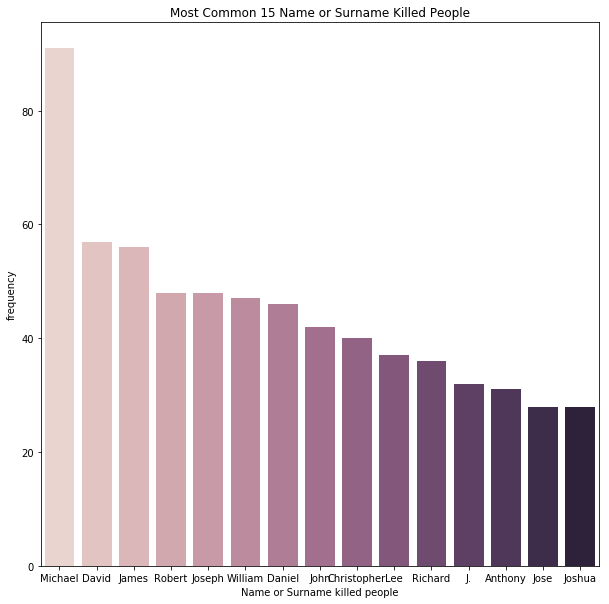

In [17]:
#most 15 commen killings name.
#palette=sns.cubehelix_palette(len(x)) x uzunluğu kadar farlı ama birbiriyle uyumlu renk verir.
known_names=killings.name[killings.name!='TK TK'].str.split()
#split boşluğa göre ikiye ayırır('eda','can')default isim atar 
n,s=zip(*known_names)
name_list=n+s
name_count=Counter(name_list)
most_common_names=name_count.most_common(15)
x,y=zip(*most_common_names)
x,y=list(x),list(y)
#virtualize 
plt.figure(figsize=(10,10))
ax=sns.barplot(x=x,y=y,palette=sns.cubehelix_palette(len(x)))
plt.xlabel("Name or Surname killed people")
plt.ylabel("frequency")
plt.title("Most Common 15 Name or Surname Killed People")
plt.show()

In [8]:
#Hıgh School Graduation rate Of the Population that is Older than 25
percent_over_completed_highSchool.head(10)
data_1=percent_over_completed_highSchool.copy()
data_1.head(20)



,Geographic Area,City,percent_completed_hs
0,AL,Abanda CDP,21.2
1,AL,Abbeville city,69.1
2,AL,Adamsville city,78.9
3,AL,Addison town,81.4
4,AL,Akron town,68.6
5,AL,Alabaster city,89.3
6,AL,Albertville city,72.7
7,AL,Alexander City city,78.1
8,AL,Alexandria CDP,88.8
9,AL,Aliceville city,74.3


In [9]:
data_1.percent_completed_hs.value_counts()



100     1301
-        197
91.7     170
92.9     169
92.5     168
91.3     163
89.3     162
93.8     161
93.2     160
92.1     159
91.9     158
92.7     158
92.2     157
90.9     156
93.4     156
89.7     153
91.1     150
93.9     150
89.4     150
90.2     149
91.6     148
91.5     147
92.6     146
93.6     146
88.1     146
90.4     145
89.1     145
94.3     144
89.9     142
89.5     142
        ... 
18         1
19.4       1
14.9       1
32.5       1
24.6       1
22.2       1
17.9       1
32.6       1
26         1
25.5       1
43.4       1
26.7       1
21.2       1
11.1       1
54.7       1
27.5       1
7.7        1
24.4       1
38.8       1
13.3       1
47.2       1
20.8       1
36.8       1
32.1       1
12.9       1
43         1
21.8       1
56.2       1
9.9        1
25.3       1
Name: percent_completed_hs, Length: 728, dtype: int64

In [10]:
data_1.percent_completed_hs.replace(['-'],0.0,inplace=True)
data_1.percent_completed_hs.value_counts()# now we fixed '-' this did 0,0

100     1301
0.0      197
91.7     170
92.9     169
92.5     168
91.3     163
89.3     162
93.8     161
93.2     160
92.1     159
92.7     158
91.9     158
92.2     157
90.9     156
93.4     156
89.7     153
89.4     150
93.9     150
91.1     150
90.2     149
91.6     148
91.5     147
93.6     146
88.1     146
92.6     146
90.4     145
89.1     145
94.3     144
89.9     142
89.5     142
        ... 
18         1
19.4       1
14.9       1
32.5       1
24.6       1
22.2       1
17.9       1
32.6       1
26         1
25.5       1
43.4       1
26.7       1
21.2       1
11.1       1
54.7       1
27.5       1
7.7        1
24.4       1
38.8       1
13.3       1
47.2       1
20.8       1
36.8       1
32.1       1
12.9       1
43         1
21.8       1
56.2       1
9.9        1
25.3       1
Name: percent_completed_hs, Length: 728, dtype: int64

In [11]:
#Hıgh School Graduation rate Of the Population that is Older than 25
data_1.percent_completed_hs.replace(['-'],0.0,inplace=True)
data_1.percent_completed_hs.value_counts()# now we fixed '-' this did 0,0
data_1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29329 entries, 0 to 29328
Data columns (total 3 columns):
Geographic Area         29329 non-null object
City                    29329 non-null object
percent_completed_hs    29329 non-null object
dtypes: object(3)
memory usage: 687.5+ KB


In [12]:
#Hıgh School Graduation rate Of the Population that is Older than 25
data_1.percent_completed_hs.replace(['-'],0.0,inplace=True)
data_1.percent_completed_hs.value_counts()# now we fixed '-' this did 0,0
#now lets make percent_completed_hd convert from objects to float
data_1.percent_completed_hs=data_1.percent_completed_hs.astype('float')
data_1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29329 entries, 0 to 29328
Data columns (total 3 columns):
Geographic Area         29329 non-null object
City                    29329 non-null object
percent_completed_hs    29329 non-null float64
dtypes: float64(1), object(2)
memory usage: 687.5+ KB


In [13]:
#Hıgh School Graduation rate Of the Population that is Older than 25
data_1.percent_completed_hs.replace(['-'],0.0,inplace=True)
data_1.percent_completed_hs.value_counts()# now we fixed '-' this did 0,0
#now lets make percent_completed_hd convert from objects to float
data_1.percent_completed_hs=data_1.percent_completed_hs.astype('float')
area_list1=list(data_1['Geographic Area'].unique())
area_highschool=[]
for i in area_list1:
    x= data_1[data_1['Geographic Area'] ==i]
    area_highschool_rate=sum(x.percent_completed_hs)/len(x)
    area_highschool.append(area_highschool_rate)
data=pd.DataFrame({'area_list1':area_list1,'area_highschool':area_highschool})
indexx=(data["area_highschool"].sort_values(ascending=True)).index.values
sorted_data=data.reindex(indexx)
sorted_data



,area_list1,area_highschool
43,TX,74.086949
24,MS,78.470718
10,GA,78.634450
31,NM,78.971783
18,LA,79.122363
2,AZ,79.218182
3,AR,79.949538
1,AK,80.098028
0,AL,80.163419
40,SC,80.645707


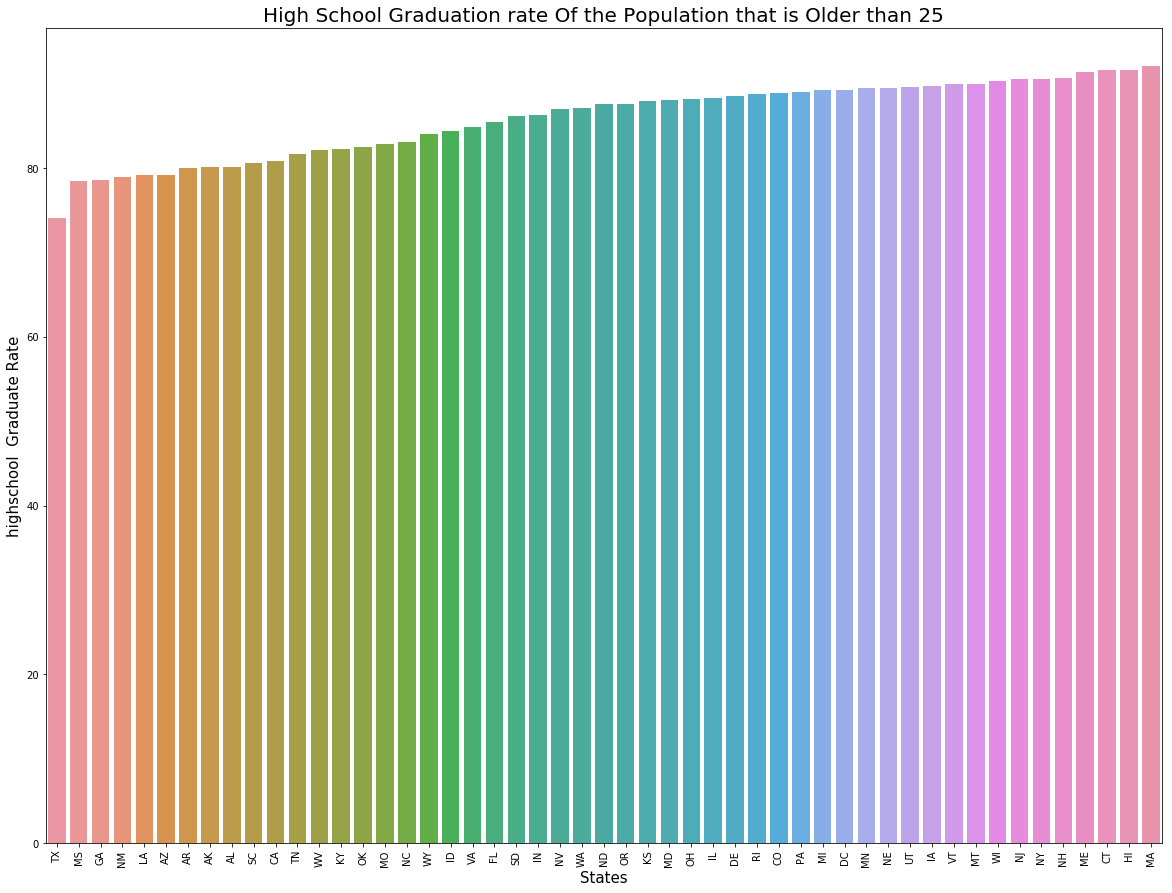

In [14]:
#Hıgh School Graduation rate Of the Population that is Older than 25
data_1.percent_completed_hs.replace(['-'],0.0,inplace=True)
data_1.percent_completed_hs.value_counts()# now we fixed '-' this did 0,0
#now lets make percent_completed_hd convert from objects to float
data_1.percent_completed_hs=data_1.percent_completed_hs.astype('float')
area_list1=list(data_1['Geographic Area'].unique())
area_highschool=[]
for i in area_list1:
    x= data_1[data_1['Geographic Area'] ==i]
    area_highschool_rate=sum(x.percent_completed_hs)/len(x)
    area_highschool.append(area_highschool_rate)
data=pd.DataFrame({'area_list1':area_list1,'area_highschool':area_highschool})
indexx=(data["area_highschool"].sort_values(ascending=True)).index.values
sorted_data=data.reindex(indexx)
sorted_data

#lets visualize 
plt.figure(figsize=(20,15))
sns.barplot(x=sorted_data['area_list1'],y=sorted_data['area_highschool'])
plt.xticks(rotation=90)
plt.xlabel('States',fontsize=15)
plt.ylabel('highschool  Graduate Rate',fontsize=15)
plt.title('High School Graduation rate Of the Population that is Older than 25',fontsize=20)
plt.show()

In [28]:
share_race_bycity.head()#read first 5 data 

,Geographic area,City,share_white,share_black,share_native_american,share_asian,share_hispanic
0,AL,Abanda CDP,67.2,30.2,0,0,1.6
1,AL,Abbeville city,54.4,41.4,0.1,1,3.1
2,AL,Adamsville city,52.3,44.9,0.5,0.3,2.3
3,AL,Addison town,99.1,0.1,0,0.1,0.4
4,AL,Akron town,13.2,86.5,0,0,0.3


In [15]:
data_2=share_race_bycity.copy()
data_2.head()


,Geographic area,City,share_white,share_black,share_native_american,share_asian,share_hispanic
0,AL,Abanda CDP,67.2,30.2,0,0,1.6
1,AL,Abbeville city,54.4,41.4,0.1,1,3.1
2,AL,Adamsville city,52.3,44.9,0.5,0.3,2.3
3,AL,Addison town,99.1,0.1,0,0.1,0.4
4,AL,Akron town,13.2,86.5,0,0,0.3


In [31]:
data_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29268 entries, 0 to 29267
Data columns (total 7 columns):
Geographic area          29268 non-null object
City                     29268 non-null object
share_white              29268 non-null object
share_black              29268 non-null object
share_native_american    29268 non-null object
share_asian              29268 non-null object
share_hispanic           29268 non-null object
dtypes: object(7)
memory usage: 1.6+ MB


In [17]:
data_2



,Geographic area,City,share_white,share_black,share_native_american,share_asian,share_hispanic
0,AL,Abanda CDP,67.2,30.2,0,0,1.6
1,AL,Abbeville city,54.4,41.4,0.1,1,3.1
2,AL,Adamsville city,52.3,44.9,0.5,0.3,2.3
3,AL,Addison town,99.1,0.1,0,0.1,0.4
4,AL,Akron town,13.2,86.5,0,0,0.3
5,AL,Alabaster city,79.4,13.5,0.4,0.9,9
6,AL,Albertville city,75.9,1.9,0.8,0.5,27.9
7,AL,Alexander City city,62.2,32,0.2,0.9,4.8
8,AL,Alexandria CDP,87.4,10.2,0.3,0.5,0.9
9,AL,Aliceville city,22.6,74.9,0.1,0,1.2


In [18]:
data_2.replace(['-'],0.0,inplace=True)
data_2.replace(['(X)'],0.0,inplace=True)#we fill NaN objects into in 0.0

data_2.loc[:,['share_white','share_black','share_native_american','share_asian','share_hispanic']]=data_2.loc[:,['share_white','share_black','share_native_american','share_asian','share_hispanic']].astype(float)
data_2.info()#we convert objects to float 



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29268 entries, 0 to 29267
Data columns (total 7 columns):
Geographic area          29268 non-null object
City                     29268 non-null object
share_white              29268 non-null object
share_black              29268 non-null object
share_native_american    29268 non-null object
share_asian              29268 non-null object
share_hispanic           29268 non-null object
dtypes: object(7)
memory usage: 1.6+ MB


In [54]:
#My Goal:Percentage of state's population according to races that are black,white,native american, asian and hispanic.
area_list2=list(data_2['Geographic area'].unique())
len(area_list2)



51

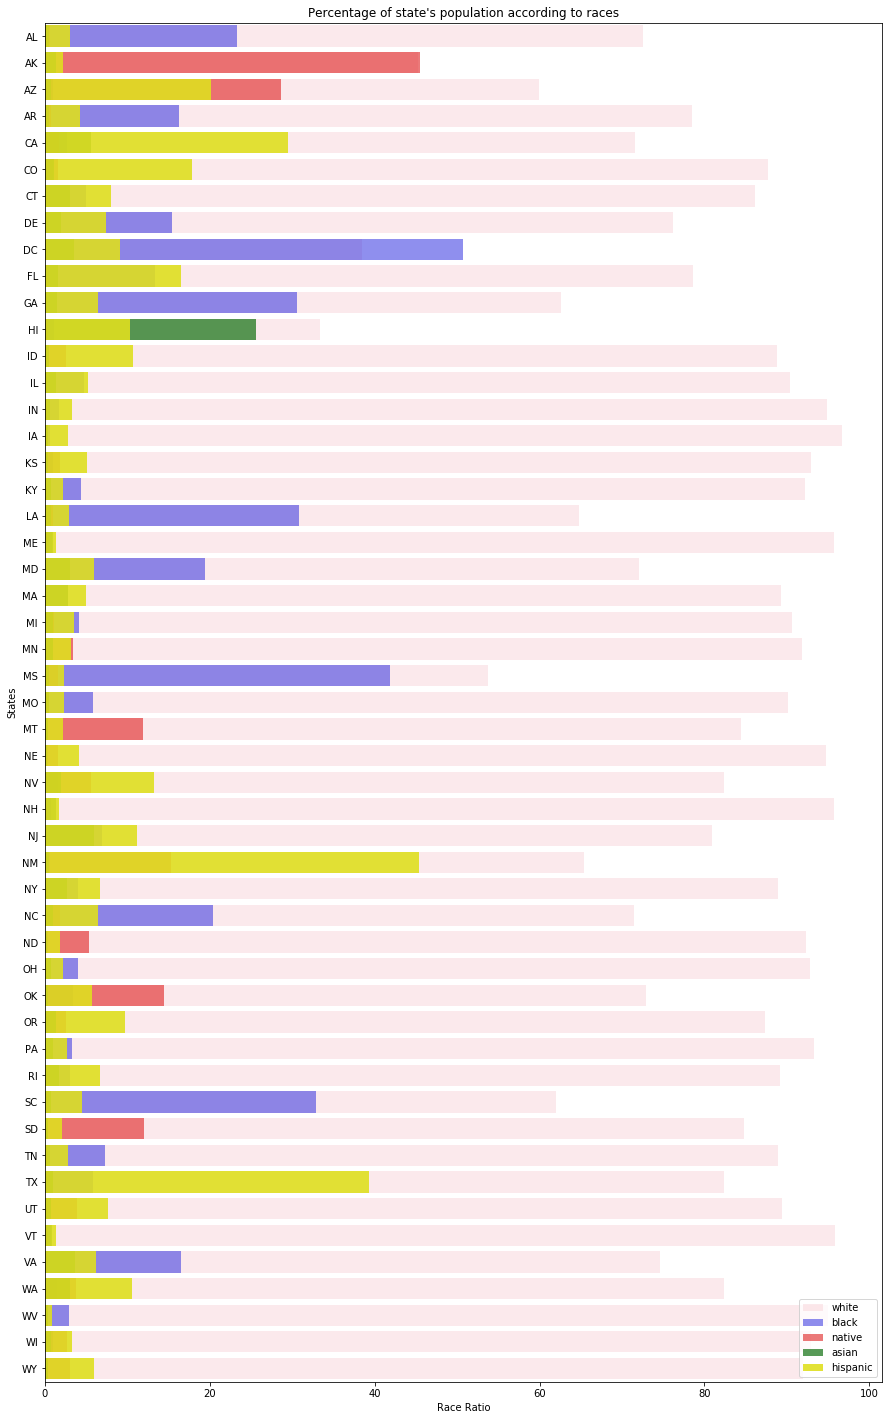

In [60]:
#My Goal:Percentage of state's population according to races that are black,white,native american, asian and hispanic.
area_list2=list(data_2['Geographic area'].unique())
white_race=[]
black_race=[]
native_american_race=[]
asian_race=[]
hispanic_race=[]
for i in area_list2:
    x=data_2[data_2['Geographic area']==i]
    white_race.append(sum(x.share_white)/len(x))
    black_race.append(sum(x.share_black)/len(x))
    native_american_race.append(sum(x.share_native_american)/len(x))
    asian_race.append(sum(x.share_asian)/len(x))
    hispanic_race.append(sum(x.share_hispanic)/len(x))
#lets make horizontal visualization
f,ax=plt.subplots(figsize=(15,25))
sns.barplot(x=white_race,y=area_list2,color='pink',alpha=0.4,label='white')
sns.barplot(x=black_race,y=area_list2,color='blue',alpha=0.5,label='black')
sns.barplot(x=native_american_race,y=area_list2,color='red',alpha=0.6,label='native')
sns.barplot(x=asian_race,y=area_list2,color='green',alpha=0.9,label='asian')
sns.barplot(x=hispanic_race,y=area_list2,color='yellow',alpha=0.9,label='hispanic')

plt.title("Percentage of state's population according to races")
plt.xlabel('Race Ratio')
plt.ylabel('States')
ax.legend(loc='lower right',frameon=True)#sağ alt köşede kutucuk oluştu fremeon =true diyerek
plt.show()


POINT PLOT
My goal is virtualize High school graduation rate vs Poverty rate of each state.
I already have  High School graduation Rate and Poverty Rate  from previous steps.
I will do Normalization.then I'll concantinating them.


In [19]:
sorted_data.head()

,area_list1,area_highschool
43,TX,74.086949
24,MS,78.470718
10,GA,78.634450
31,NM,78.971783
18,LA,79.122363


In [20]:
  sorted_data1.head()

,area_list,area_poverty_ratio
24,MS,26.884254
2,AZ,25.268071
10,GA,23.663636
3,AR,22.963216
31,NM,22.507675


In [21]:
#now lets normalize each data to make observation more clear 
sorted_data1['area_poverty_ratio']=sorted_data1['area_poverty_ratio']/max(sorted_data1['area_poverty_ratio'])
sorted_data1.head() #you can see we normalize area_poverty_ratio 0<x<1

,area_list,area_poverty_ratio
24,MS,1.000000
2,AZ,0.939884
10,GA,0.880204
3,AR,0.854151
31,NM,0.837207


In [22]:
#now lets normalize each data to make observation more clear.
#concantenate data and add to new_data.
sorted_data1['area_poverty_ratio']=sorted_data1['area_poverty_ratio']/max(sorted_data1['area_poverty_ratio'])
sorted_data['area_highschool']=sorted_data['area_highschool']/max(sorted_data['area_highschool'])
new_data=pd.concat([sorted_data,sorted_data1['area_poverty_ratio']],axis=1)
new_data.head()
new_data.sort_values('area_poverty_ratio',inplace=True)
new_data.sort_values('area_highschool',inplace=True)
new_data.head()

,area_list1,area_highschool,area_poverty_ratio
43,TX,0.805044,0.725191
24,MS,0.852679,1.000000
10,GA,0.854458,0.880204
31,NM,0.858124,0.837207
18,LA,0.859760,0.829176


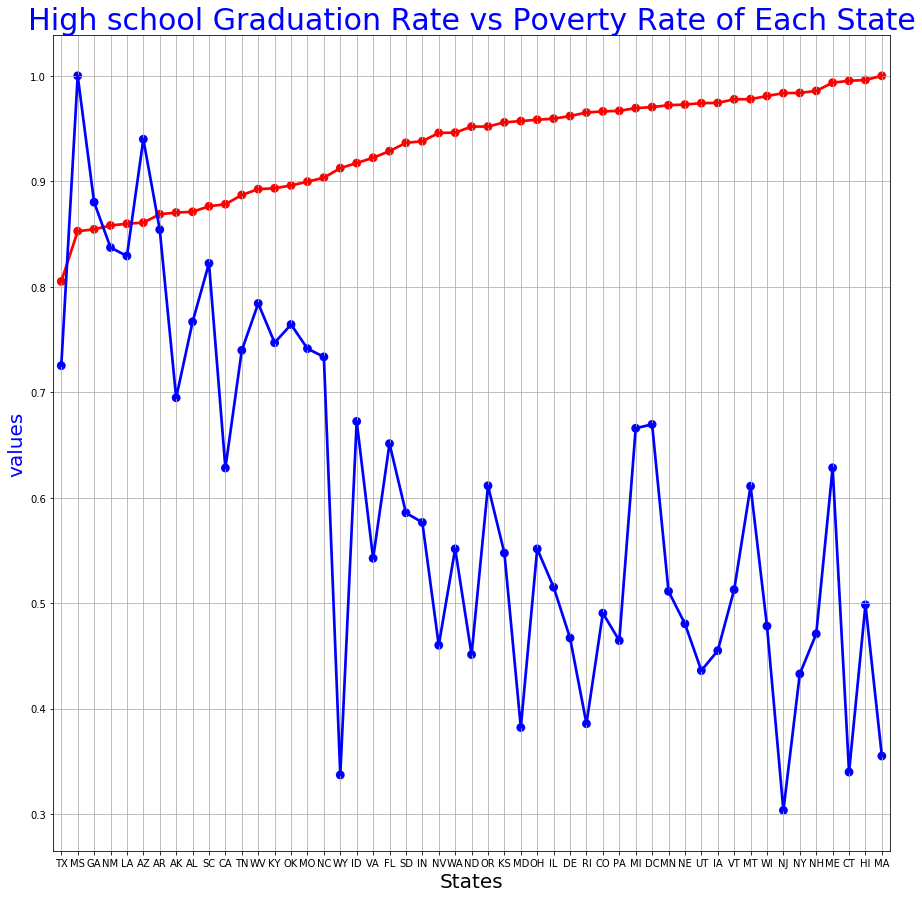

In [81]:
#sorted_data1['area_poverty_ratio']=sorted_data1['area_poverty_ratio']/max(sorted_data1['area_poverty_ratio'])
#sorted_data['area_highschool']=sorted_data['area_highschool']/max(sorted_data['area_highschool'])
#new_data=pd.concat([sorted_data,sorted_data1['area_poverty_ratio']],axis=1)
#Lets virtualize using seaborn libraries Pointplot.

f,ax=plt.subplots(figsize=(15,15))
sns.pointplot(x='area_list1',y='area_highschool',data=new_data,color='red',alpha=0.8)
sns.pointplot(x='area_list1',y='area_poverty_ratio',data=new_data,color='blue',alpha=0.9)
plt.xlabel('States',fontsize=20,color='black')
plt.ylabel('values',fontsize=20,color='blue')
plt.title('High school Graduation Rate vs Poverty Rate of Each State',fontsize=30,color='blue')
plt.grid()
plt.show()

# JoInt Plot

In [23]:
#High school graduation rate vs Poverty rate of each state.
new_data.head()


,area_list1,area_highschool,area_poverty_ratio
43,TX,0.805044,0.725191
24,MS,0.852679,1.000000
10,GA,0.854458,0.880204
31,NM,0.858124,0.837207
18,LA,0.859760,0.829176


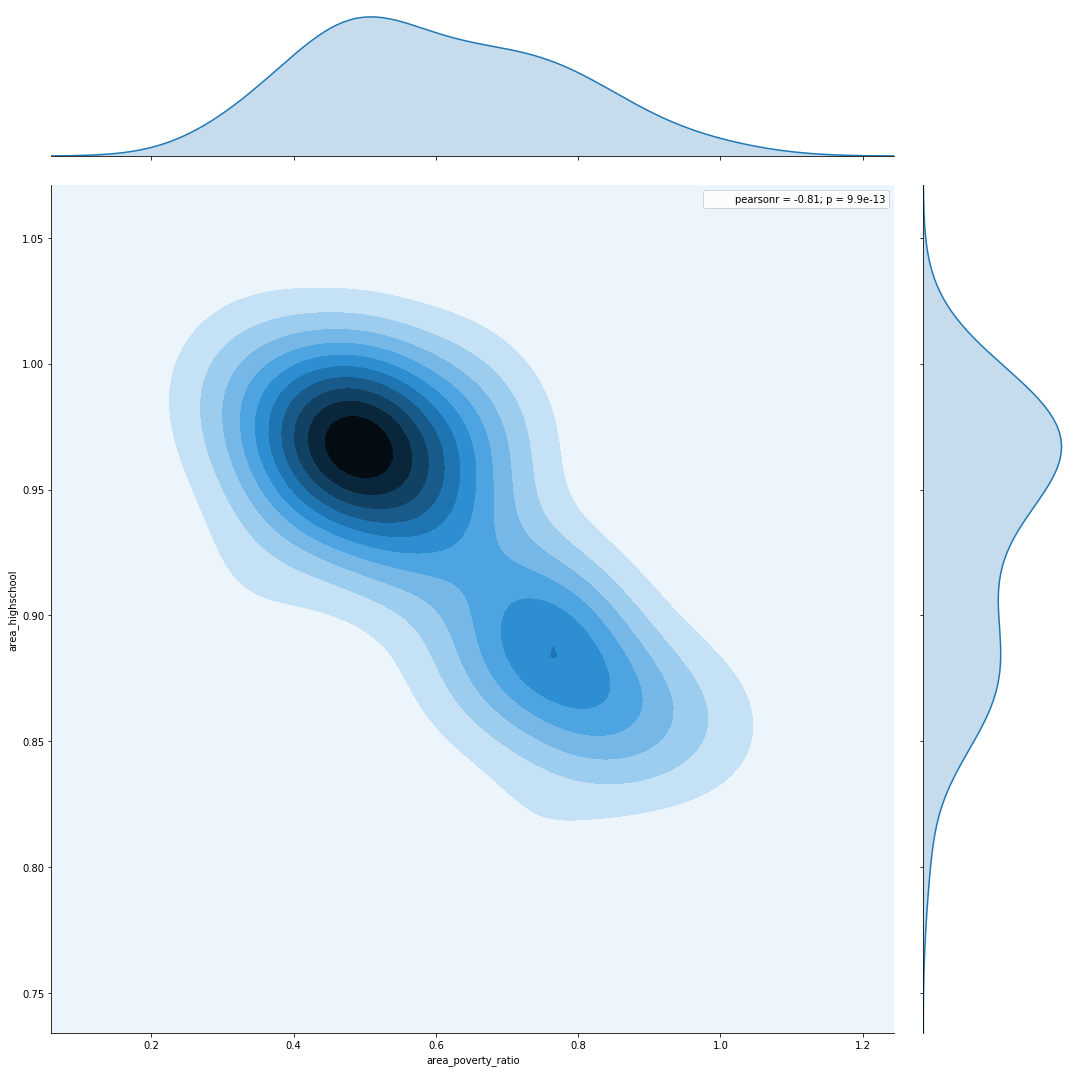

In [94]:
#Vırtualize 
g=sns.jointplot('area_poverty_ratio','area_highschool',data=new_data,kind="kde",size=15)

plt.show()


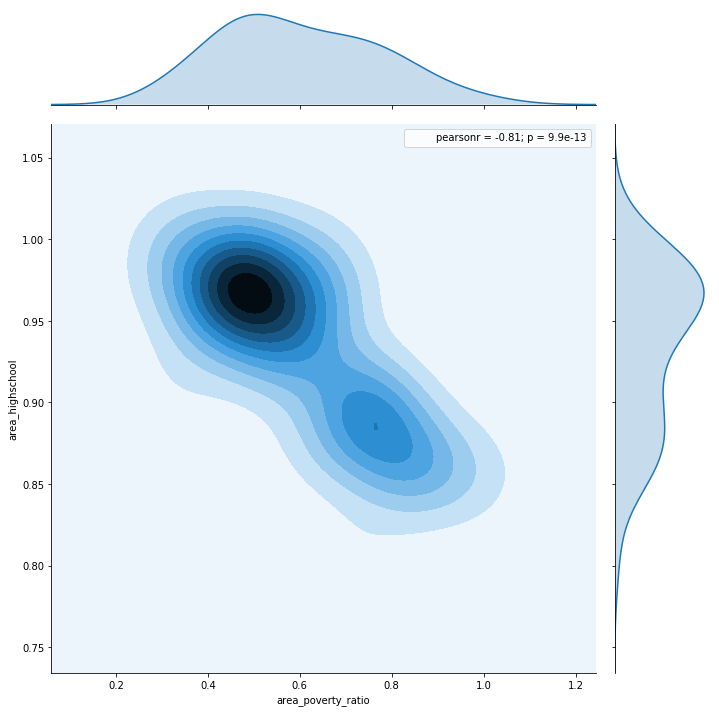

In [96]:
c=sns.jointplot(new_data.area_poverty_ratio,new_data.area_highschool,kind='kde',size=10)
plt.show()

C:\Users\simay\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\simay\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


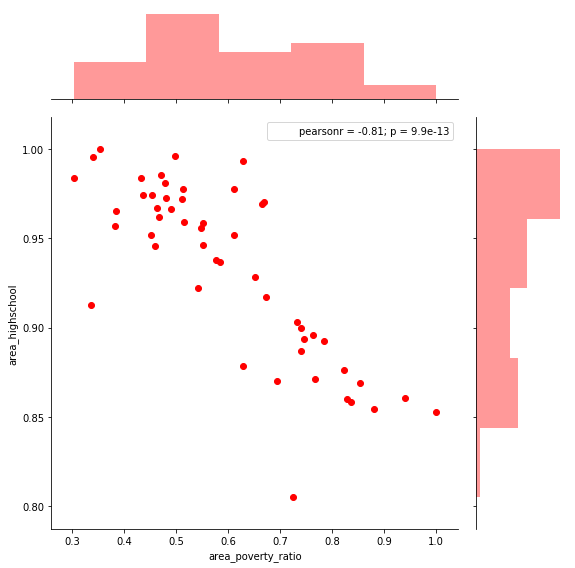

In [102]:
# you can change parameters of joint plot
# kind : { “scatter” | “reg” | “resid” | “kde” | “hex” }
# Different usage of parameters but same plot with previous one
g = sns.jointplot("area_poverty_ratio", "area_highschool", data=new_data,size=8, ratio=4, color="r")
plt.show()

In [ ]:
PIE PLOT 
plt.pie() # owner is matplotlib librarie
#Race rates according to killing data 


In [104]:
#Race rates according to killing data 
killings.head()


,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [109]:
killings.race.dropna(inplace=True)
killings.race.value_counts()

W    1201
B     618
H     423
A      39
N      31
O      28
Name: race, dtype: int64

#  PIE PLOT

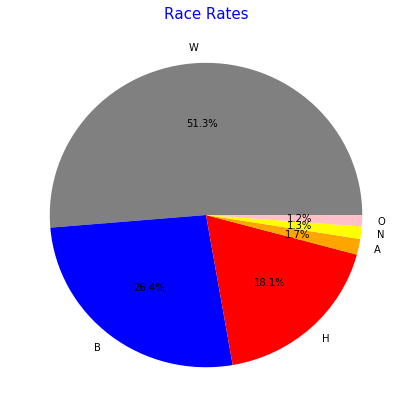

In [111]:
#Race rates according to killing data
labels=killings.race.value_counts().index
colors=['grey','blue','red','orange','yellow','pink']
explode=[0,0,0,0,0,0]
rates=killings.race.value_counts().values
plt.figure(figsize=(7,7))
plt.pie(rates,explode=explode,labels=labels,colors=colors,autopct='%1.1f%%')
plt.title('Race Rates',fontsize=15,color='Blue')
plt.show()

#boxplot

In [4]:
killings.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


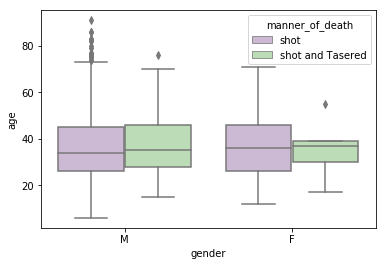

In [10]:
sns.boxplot(x='gender',y='age',hue='manner_of_death',data=killings,palette='PRGn')
plt.show()

In [38]:
a=[list[i]if i>30 for i in killings.age ]


SyntaxError: invalid syntax (<ipython-input-38-9b7f81f9491c>, line 1)

In [ ]:
SWARM PLOT

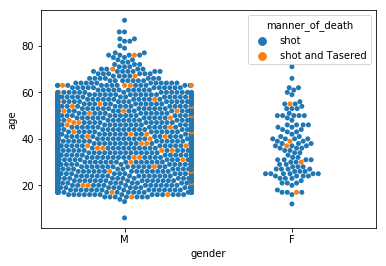

In [13]:
#manner of death
#age
#gender
#visualiza swarm plot
sns.swarmplot(x='gender',y='age',hue='manner_of_death',data=killings)
plt.show()


In [16]:
killings.manner_of_death.value_counts()

shot                2363
shot and Tasered     172
Name: manner_of_death, dtype: int64

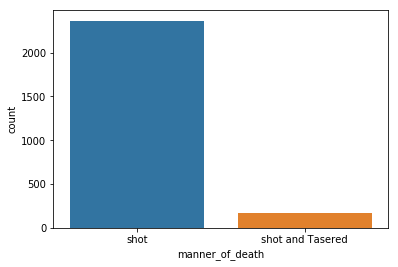

In [14]:
#Count PLOT 
#manner of death
sns.countplot(killings.manner_of_death)
plt.show()

In [24]:
above30=['above30'if i>=30 else 'below30' for i in killings.age]
dfa=pd.DataFrame({'age':above30})
dfa.head()
killings.age.head()

0    53.0
1    47.0
2    23.0
3    32.0
4    39.0
Name: age, dtype: float64

In [25]:
dfa.head()


,age
0,above30
1,above30
2,below30
3,above30
4,above30


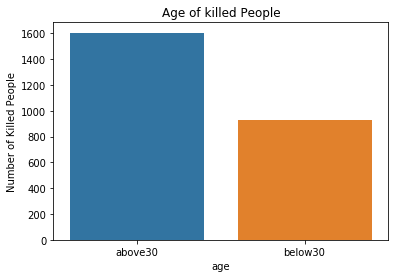

In [28]:
above30=['above30'if i>=30 else 'below30' for i in killings.age]
dfa=pd.DataFrame({'age':above30})
sns.countplot(x=dfa.age)
plt.ylabel('Number of Killed People')
plt.title('Age of killed People')
plt.show()


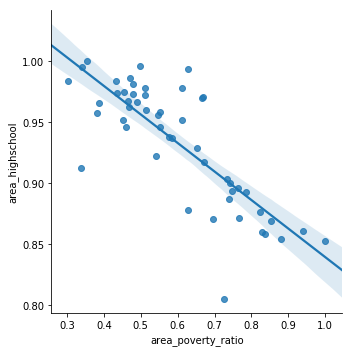

In [26]:
sns.lmplot(x='area_poverty_ratio',y='area_highschool',data=new_data)
plt.show()

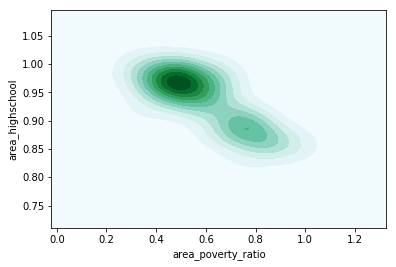

In [27]:
sns.kdeplot(new_data.area_poverty_ratio,new_data.area_highschool,shade=True,cut=4)
plt.show()

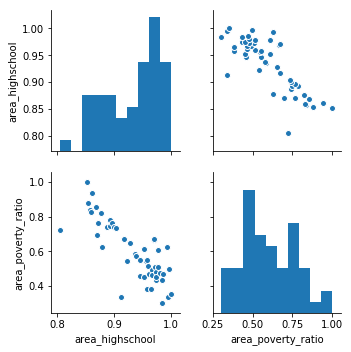

In [28]:
sns.pairplot(new_data)
plt.show()

In [29]:
new_data.corr()


,area_highschool,area_poverty_ratio
area_highschool,1.000000,-0.805761
area_poverty_ratio,-0.805761,1.000000


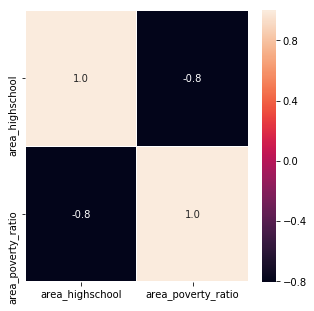

In [35]:
#heatmap
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(new_data.corr(),annot=True,linewidth=.4,fmt='.1f',ax=ax)
plt.show()

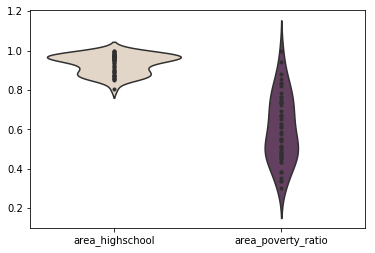

In [36]:
#Violin Plot
vio=sns.cubehelix_palette(2,rot=.5,dark=.3)
sns.violinplot(data=new_data,palette=vio,inner='points')
plt.show()
